In [45]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
sep = os.sep

In [46]:
os.chdir('C:\\Projects\\ature\\')

In [47]:
train_val = pd.read_csv('net_logs'+sep+'unet-drive.chk.tar.csv', index_col='TYPE')

val = train_val.query('TYPE==1')
T_val = np.arange(val.shape[0])

train = train_val.query('TYPE==0')
T_train =np.arange(train.shape[0])

test= pd.read_csv('net_logs'+sep+'unet-drive.chk.tar-TEST.csv', index_col='TYPE')
T_test = np.arange(test.shape[0])

In [49]:
train_val1 = pd.read_csv('net_logs'+sep+'unet-drive.fishing.chk.tar.csv', index_col='TYPE')

val1 = train_val1.query('TYPE==1')
T_val1 = np.arange(val1.shape[0])

train1 = train_val1.query('TYPE==0')
T_train1 =np.arange(train1.shape[0])

test1= pd.read_csv('net_logs'+sep+'unet-drive.chk.tar-TEST.csv', index_col='TYPE')
T_test1 = np.arange(test1.shape[0])

### Validation Precision-Recall

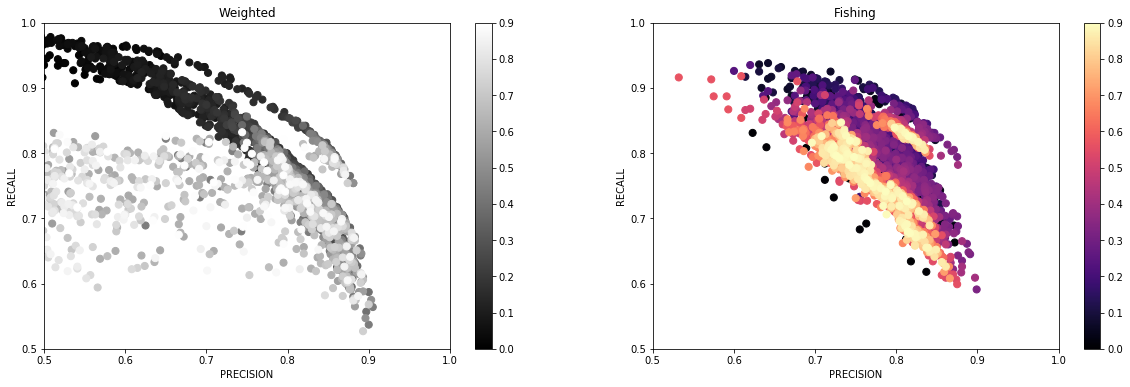

In [50]:
plt.rcParams["figure.figsize"] = [20,6]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
z = np.linspace(0,0.9, val['PRECISION'].shape[0])
z1 = np.linspace(0,0.9, val1['PRECISION'].shape[0])
plots = val.plot.scatter(x='PRECISION', y='RECALL', c=z, colormap='gray', ax=ax1, s=50, xlim=(0.5,1), ylim=(0.5,1), title='Weighted')
plots = val1.plot.scatter(x='PRECISION', y='RECALL', c=z1, colormap='magma', ax=ax2, s=50,  xlim=(0.5,1), ylim=(0.5,1), title='Fishing')
plt.show()

### Validation F1 Score

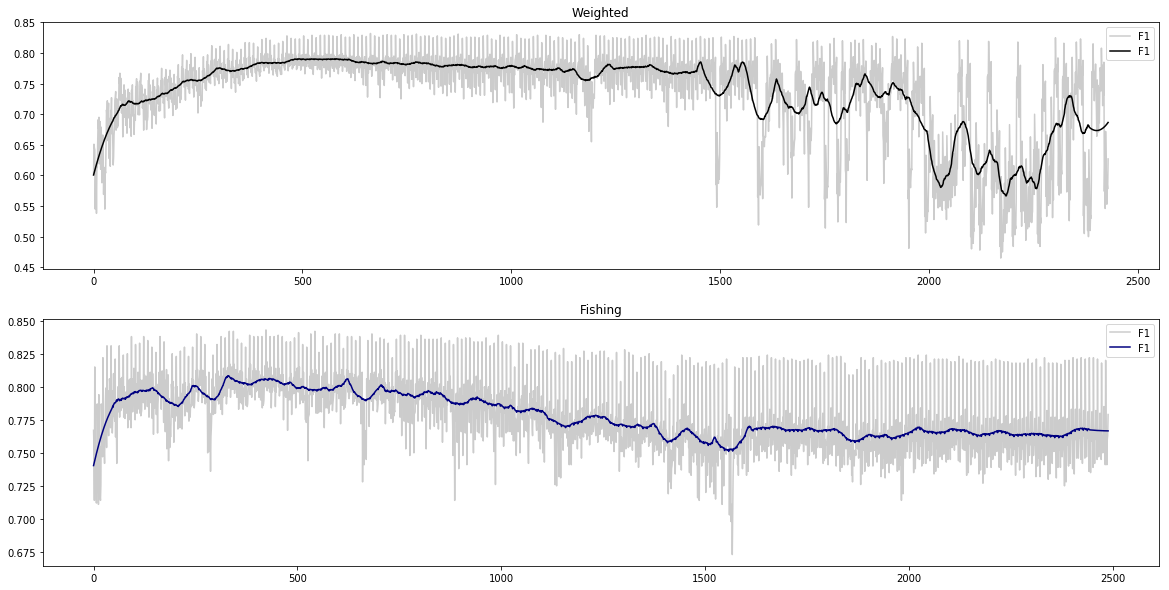

In [51]:
plt.rcParams["figure.figsize"] = [20,10]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
df, df1 = val.copy(), val1.copy()
df['F1'] = savgol_filter(df['F1'], 91, 2)
df1['F1'] = savgol_filter(df1['F1'], 91, 2)
plots = val.plot(y='F1', x=T_val, c='#cccccc', ax=ax1, title="Weighted")
plots = df.plot(y='F1', x=T_val, colormap='gray', ax=ax1)
plots = val1.plot(y='F1', x=T_val1, c='#cccccc', ax=ax2, title="Fishing")
plots = df1.plot(y='F1', x=T_val1, c='navy', ax=ax2)
plt.show()

### Validation Accuracy

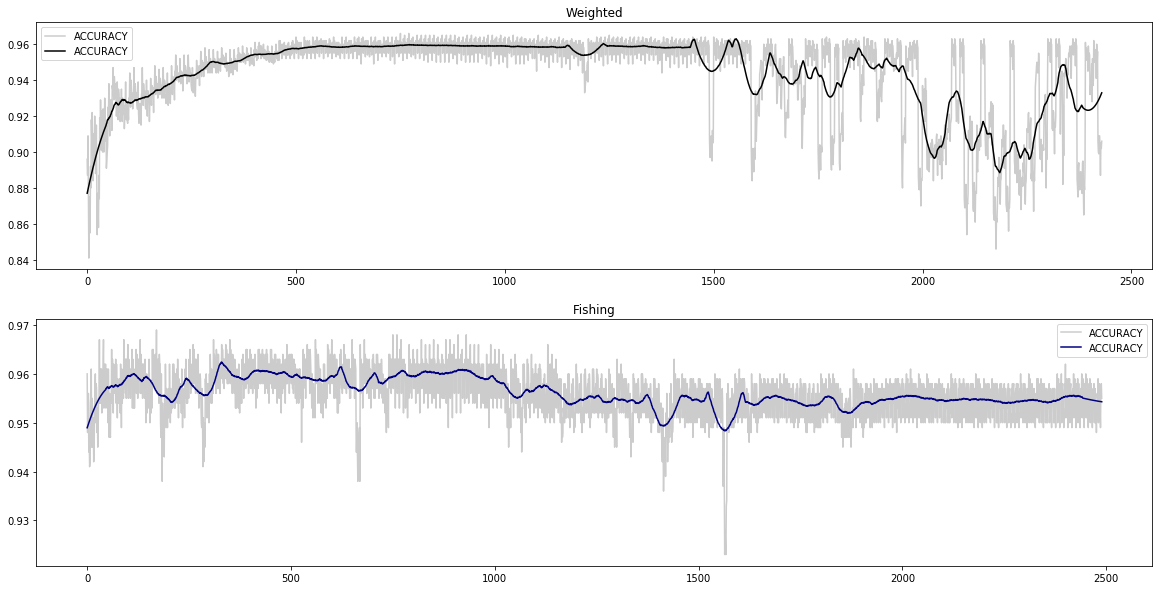

In [52]:
plt.rcParams["figure.figsize"] = [20,10]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
df, df1 = val.copy(), val1.copy()
df['ACCURACY'] = savgol_filter(df['ACCURACY'], 91, 2)
df1['ACCURACY'] = savgol_filter(df1['ACCURACY'], 91, 2)
plots = val.plot(y='ACCURACY', x=T_val, c='#cccccc', ax=ax1, title="Weighted")
plots = df.plot(y='ACCURACY', x=T_val, colormap='gray', ax=ax1)
plots = val1.plot(y='ACCURACY', x=T_val1, c='#cccccc', ax=ax2, title="Fishing")
plots = df1.plot(y='ACCURACY', x=T_val1, c='navy', ax=ax2)
plt.show()

### Training F1 Score

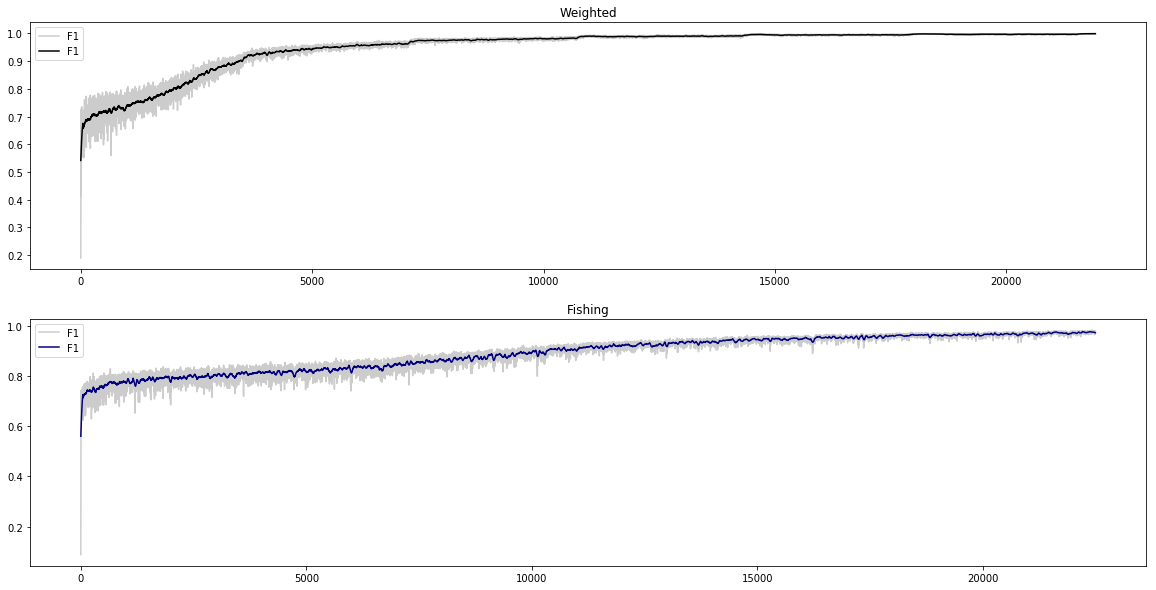

In [53]:
plt.rcParams["figure.figsize"] = [20,10]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
df, df1 = train.copy(), train1.copy()
df['F1'] = savgol_filter(df['F1'], 91, 2)
df1['F1'] = savgol_filter(df1['F1'], 91, 2)
plots = train.plot(y='F1', x=T_train, c='#cccccc', ax=ax1, title="Weighted")
plots = df.plot(y='F1', x=T_train, colormap='gray', ax=ax1)
plots = train1.plot(y='F1', x=T_train1, c='#cccccc', ax=ax2, title="Fishing")
plots = df1.plot(y='F1', x=T_train1, c='navy', ax=ax2)
plt.show()

### Training precision-recall

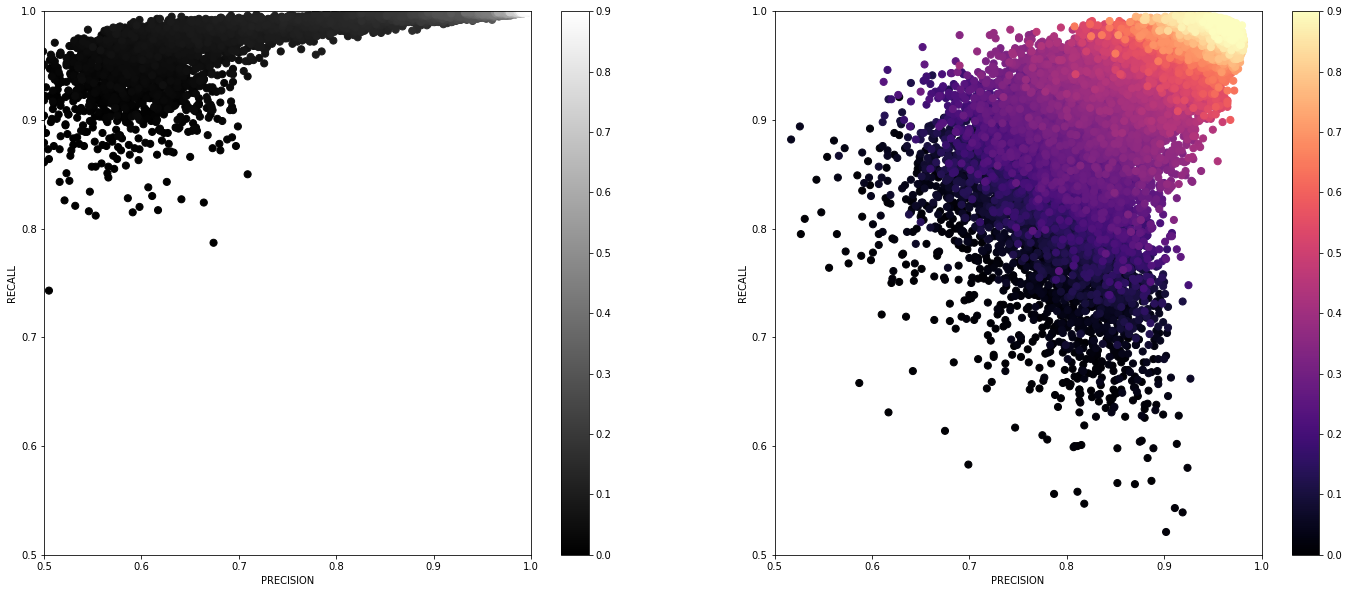

In [54]:
plt.rcParams["figure.figsize"] = [24,10]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
z = np.linspace(0,0.9, train['PRECISION'].shape[0])
z1 = np.linspace(0,0.9, train1['PRECISION'].shape[0])
plots = train.plot.scatter(x='PRECISION', y='RECALL', c=z, colormap='gray', ax=ax1, s=50, xlim=(0.5,1), ylim=(0.5,1))
plots = train1.plot.scatter(x='PRECISION', y='RECALL', c=z1, colormap='magma', ax=ax2, s=50,  xlim=(0.5,1), ylim=(0.5,1))
plt.show()

### Training loss

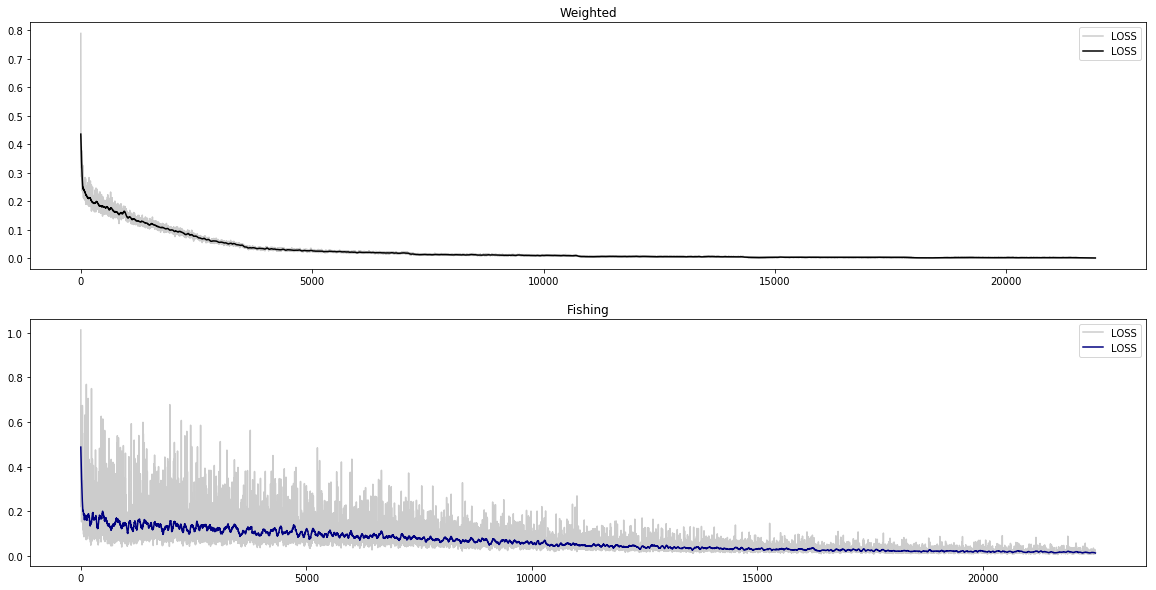

In [55]:
plt.rcParams["figure.figsize"] = [20,10]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
df, df1 = train.copy(), train1.copy()
df['LOSS'] = savgol_filter(df['LOSS'], 91, 2)
df1['LOSS'] = savgol_filter(df1['LOSS'], 91, 2)
plots = train.plot(y='LOSS', x=T_train, c='#cccccc', ax=ax1, title="Weighted")
plots = df.plot(y='LOSS', x=T_train, colormap='gray', ax=ax1)
plots = train1.plot(y='LOSS', x=T_train1, c='#cccccc', ax=ax2, title="Fishing")
plots = df1.plot(y='LOSS', x=T_train1, c='navy', ax=ax2)
plt.show()

### Training Accuracy

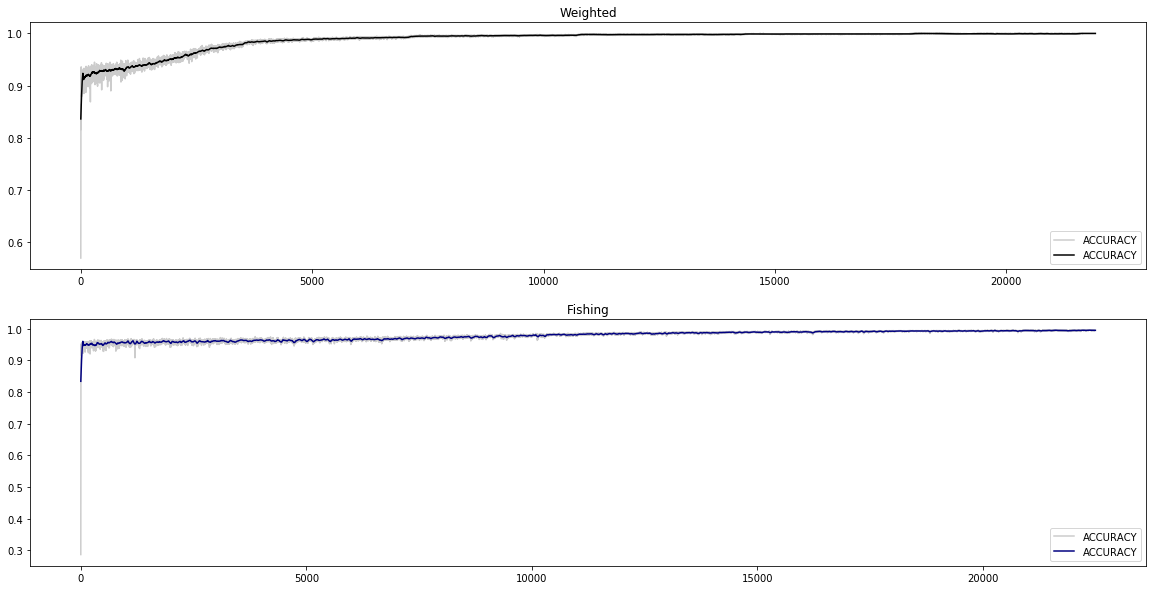

In [56]:
plt.rcParams["figure.figsize"] = [20,10]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
df, df1 = train.copy(), train1.copy()
df['ACCURACY'] = savgol_filter(df['ACCURACY'], 91, 2)
df1['ACCURACY'] = savgol_filter(df1['ACCURACY'], 91, 2)
plots = train.plot(y='ACCURACY', x=T_train, c='#cccccc', ax=ax1, title="Weighted")
plots = df.plot(y='ACCURACY', x=T_train, colormap='gray', ax=ax1)
plots = train1.plot(y='ACCURACY', x=T_train1, c='#cccccc', ax=ax2, title="Fishing")
plots = df1.plot(y='ACCURACY', x=T_train1, c='navy', ax=ax2)
plt.show()

### TEST F1 Score

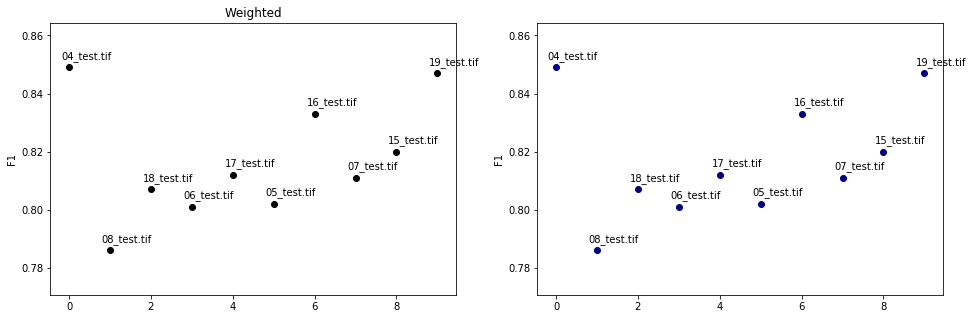

In [41]:
plt.rcParams["figure.figsize"] = [16,5]
ax = plt.subplot(121)
ax.scatter(T_test, test['F1'], color='black')
for i, txt in enumerate(test['ID']):
    ax.annotate(txt, (T_test[i], test['F1'].iloc[i]), xytext=(T_test[i]-0.2, test['F1'].iloc[i]+0.003))
plt.title('Weighted')
plt.ylabel('F1')

ax = plt.subplot(122)
ax.scatter(T_test1, test1['F1'], color='navy')
for i, txt in enumerate(test['ID']):
    ax.annotate(txt, (T_test1[i], test1['F1'].iloc[i]), xytext=(T_test1[i]-0.2, test1['F1'].iloc[i]+0.003))
plt.ylabel('F1')
plt.show()

### TEST precision-recall

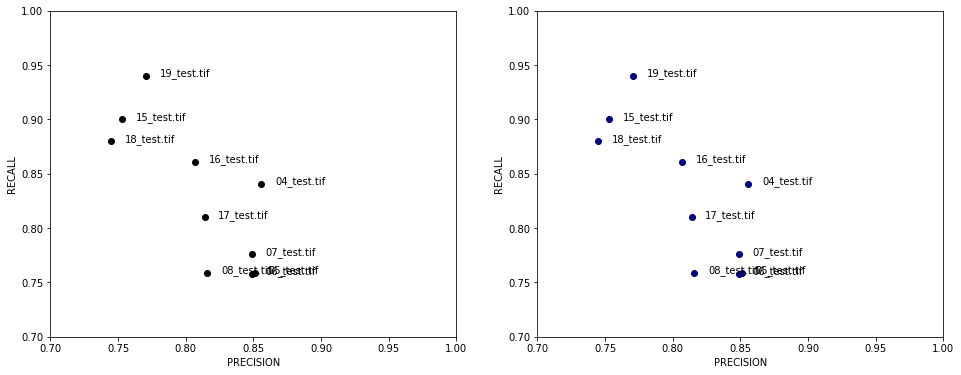

In [42]:
plt.rcParams["figure.figsize"] = [16,6]

ax = plt.subplot(121)
plt.scatter(test['PRECISION'], test['RECALL'], color='black')
for i, txt in enumerate(test['ID']):
    ax.annotate(txt, (test['PRECISION'].iloc[i]+0.01, test['RECALL'].iloc[i]))
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.xlim((0.7, 1))
plt.ylim((0.7, 1))

ax = plt.subplot(122)
plt.scatter(test1['PRECISION'], test1['RECALL'], color='navy')
for i, txt in enumerate(test1['ID']):
    ax.annotate(txt, (test1['PRECISION'].iloc[i]+0.01, test1['RECALL'].iloc[i]))
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.xlim((0.7, 1))
plt.ylim((0.7, 1))
plt.show()

### Test Accuracy

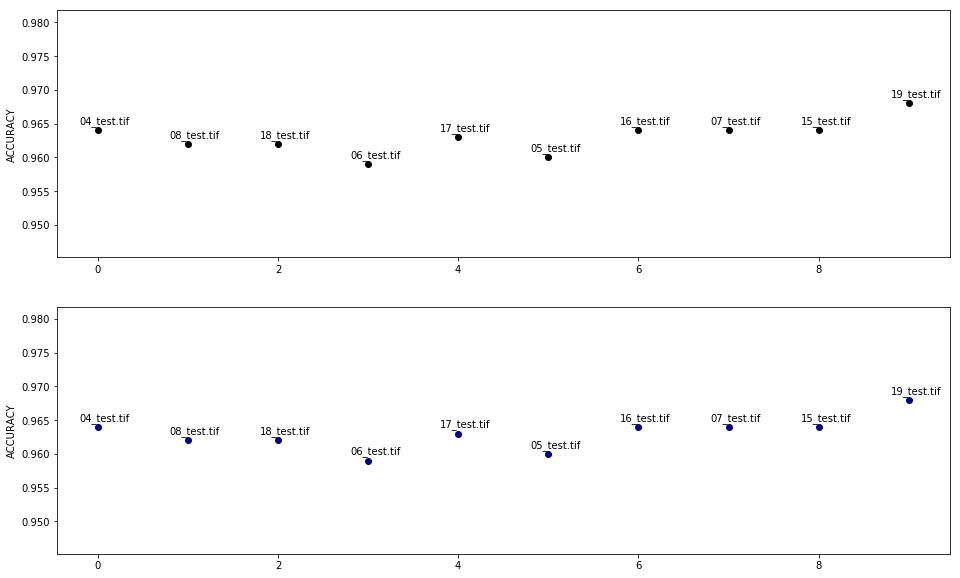

In [43]:
plt.rcParams["figure.figsize"] = [16,10]

ax = plt.subplot(211)
ax.scatter(T_test, test['ACCURACY'], color='black')
for i, txt in enumerate(test['ID']):
    ax.annotate(txt, (T_test[i], test['ACCURACY'].iloc[i]), xytext=(T_test[i]-0.2, test['ACCURACY'].iloc[i]+0.001))
plt.ylabel('ACCURACY')

ax = plt.subplot(212)
ax.scatter(T_test1, test1['ACCURACY'], color='navy')
for i, txt in enumerate(test1['ID']):
    ax.annotate(txt, (T_test1[i], test1['ACCURACY'].iloc[i]), xytext=(T_test1[i]-0.2, test1['ACCURACY'].iloc[i]+0.001))
plt.ylabel('ACCURACY')
plt.show()

### MST

In [98]:
import numpy as np
from commons.segmentation import AtureTest
from PIL import Image as IMG
from commons.IMAGE import SegmentedImage
import cv2
import utils.filter_utils as filutils
import utils.img_utils as imgutils
### DRIVE dataset path setup #####
Dirs = {}

Dirs['data']      = 'data'+sep+'DRIVE'+sep+'testing'

Dirs['images']    = Dirs['data'] +sep+ 'images'
Dirs['mask']      = Dirs['data'] +sep+ 'mask'
Dirs['truth']     = Dirs['data'] +sep+ 'manual1'
Dirs['segmented'] = Dirs['data'] +sep+ 'segmented'

for k, folder in Dirs.items():
    os.makedirs(folder, exist_ok=True)

def get_mask_file(file_name): 
    return file_name.split('_')[0] + '_test_mask.gif'
def get_ground_truth_file(file_name): 
    return file_name.split('_')[0] + '_manual1.gif'

input_image = '05_test.tif'
###### Path end #####
params = {'sk_threshold': 100,
          'alpha': 5.0,
          'orig_contrib': 0.6,
          'seg_threshold': 15}

In [101]:
img_obj = SegmentedImage()

img_obj.load_file(data_dir=Dirs['images'], file_name=input_image)
img_obj.working_arr = img_obj.image_arr[:,:,1]
img_obj.apply_clahe()
img_obj.res['orig'] = img_obj.working_arr

img_obj.working_arr = imgutils.get_image_as_array(Dirs['segmented'] +sep+ '05_test.tif.png', channels=1)
img_obj.load_mask(mask_dir=Dirs['mask'], fget_mask=get_mask_file, erode=True)
img_obj.load_ground_truth(gt_dir=Dirs['truth'], fget_ground_truth=get_ground_truth_file)
img_obj.apply_mask()
img_obj.generate_skeleton(threshold=params['sk_threshold'])
img_obj.generate_lattice_graph()

"generate_skeleton(__)" ... took 0.001 seconds
"generate_lattice_graph(__)" ... took 2.168 seconds


In [102]:
tester = AtureTest(out_dir=Dirs['segmented'])
tester.run(params=params, save_images=False, img_obj=img_obj)
img_obj.res['scores']

"run_segmentation(__)" ... took 88.37 seconds
Number of params combination tried: 1


{'Accuracy': 0.9633834404170203,
 'F1': 0.8048016026883805,
 'Precision': 0.803866511747999,
 'Recall': 0.8057388716356108}

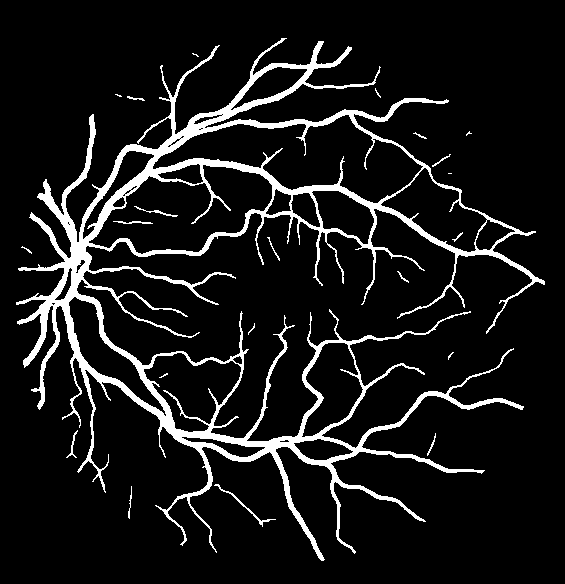

In [103]:
IMG.fromarray(img_obj.res['segmented'])

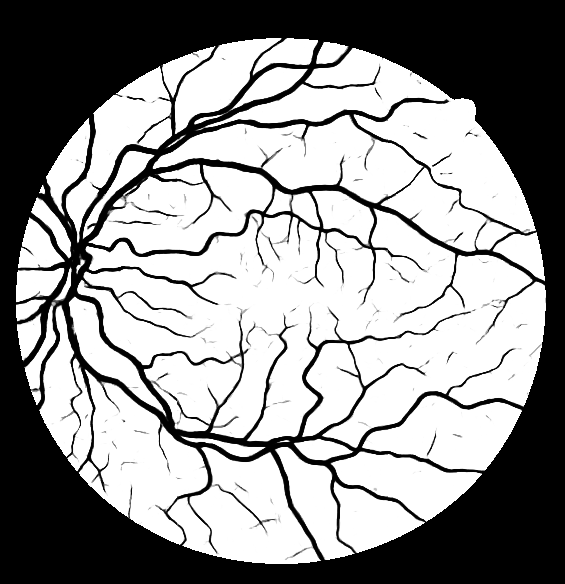

In [104]:
IMG.fromarray(img_obj.working_arr)

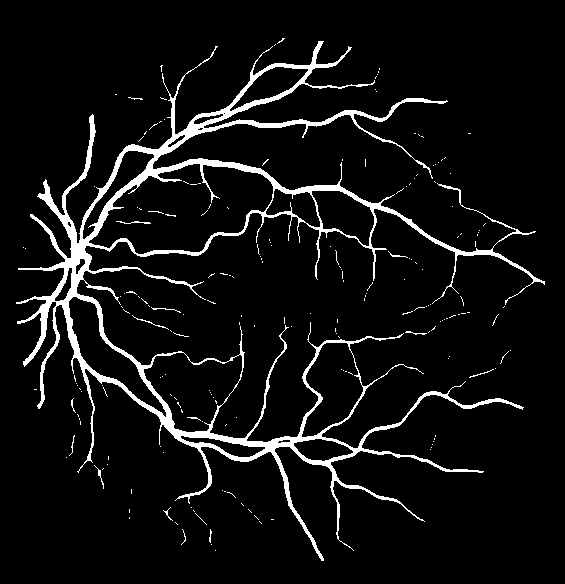

In [105]:
IMG.fromarray(img_obj.res['skeleton'])

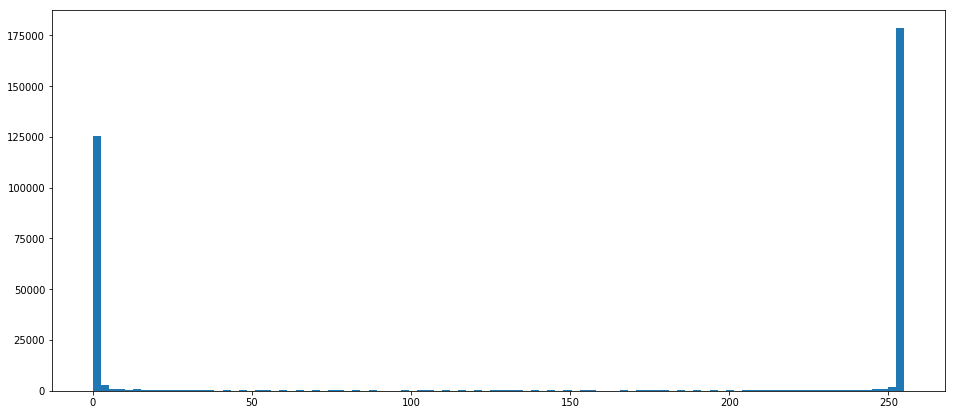

In [106]:
imgutils.histogram(img_obj.working_arr, bins=100)

In [168]:
arr = img_obj.working_arr.copy()

In [169]:
arr[arr>=150] = 255

In [170]:
arr[arr<150] = 0

In [171]:
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        if img_obj.mask[i,j] == 0:
            arr[i, j] =255

In [172]:
imgutils.get_praf1(255-arr, img_obj.ground_truth)

{'Accuracy': 0.963589526003152,
 'F1': 0.804370481339152,
 'Precision': 0.8098032786885246,
 'Recall': 0.7990100931677019}

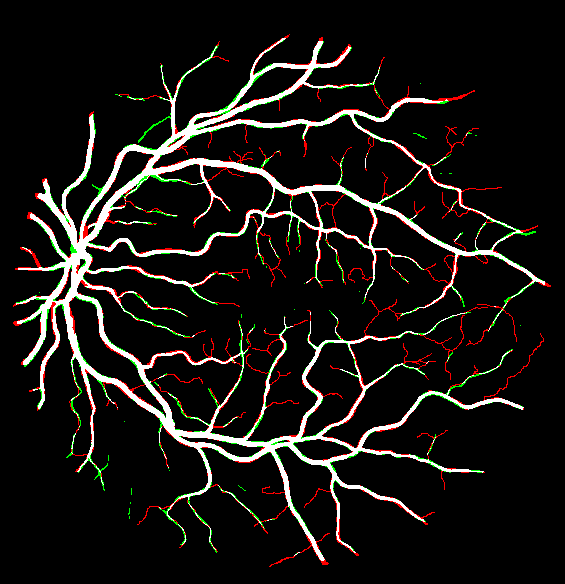

In [160]:
IMG.fromarray(imgutils.get_rgb_scores(255-arr, img_obj.ground_truth))

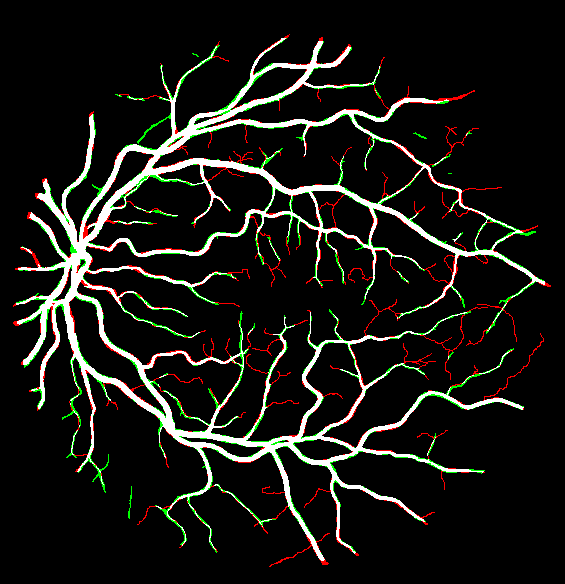

In [107]:
IMG.fromarray(imgutils.get_rgb_scores(img_obj.res['segmented'], img_obj.ground_truth))

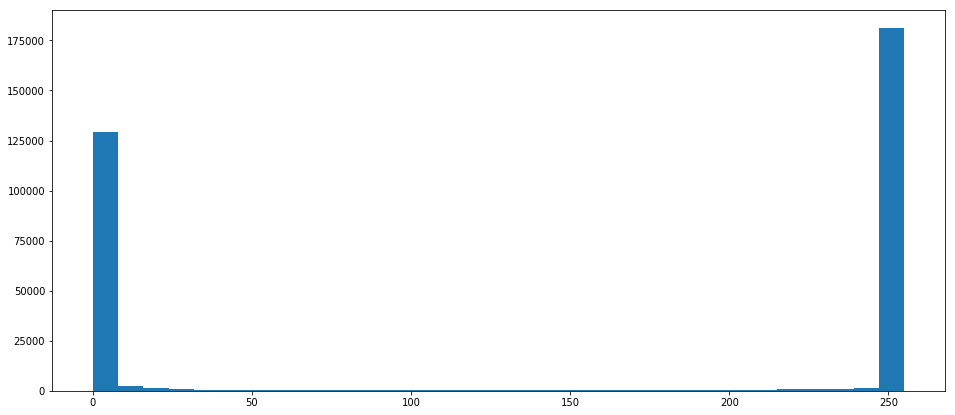

In [173]:
imgutils.histogram(img_obj.working_arr)

In [23]:
X = img_obj.working_arr
from sklearn.decomposition import NMF
model = NMF(n_components=10, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_